#**A REVIEW BASED RESTAURANT RECOMMENDATION SYSTEM**

**PROBLEM STATEMENT**

Now a days the competition for restaurant business is increasing due to vast number of restaurants which are providing the best quality for users. Here the quality of restaurant includes food and drink, atmosphere, place and service. The reviews which are taken from the dataset will be classified and it will determine the feedback as positive or negative or of users. The reviews can be anything which is related to the food, staff and overall review of the restaurant. This will analyze the restaurant reviews and presents useful information without considering the ratings. In this we will be using the machine learning algorithms with NLP techniques to classify the reviews in proper aspects and performing a sentiment analysis on them. The main benefit of this classification results is to recommend for users to choose the best restaurant.


**DATASET DESCRIPTION**

*   The dataset consist of restaurants and their reviews.
*   Understanding the columns in dataset.

**User_id**: every user is given with a particular id , so that we don’t have confusion among the users.

**Place_id**:  every restaurant is given with unique id even, so that even if the restaurant name repeated we can easily identify.

**Restaurant**: name of the restaurant.
City, state, country : tells us about the address of restaurant.

**Food price** : this column is regarding the price of items in a restaurant like medium ,high or low.

**Smoking area** : this tells about whether we can smoke in the restaurant or not, if yes is there any separate space for smoking.

**Restaurant cuisine** : the special cuisine present in the restaurant.

**User budget**: by this column we can know the amount that can be spent according to his financial status.

**User cuisine** : this column is for the users favourite cuisine.

**Reviews** : these are the comments given for a restaurant given by the user.


In [89]:
# IMPORTING ALL THE REQUIRED PACKAGES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from textblob import TextBlob
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn import neighbors
from scipy import optimize
import math
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv("/content/restaurant_review_starting.csv")
df.head(10)

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,medium,not permitted,Spanish,medium,American,Just lucky to find this place. Quiet but very ...,NaN
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,medium,section,Italian,medium,Mexican,"The food was excellent, the service was very g...",NaN
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,low,none,Latin_American,medium,Mexican,Popped in by accident walking around the hotel...,NaN
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,medium,none,Mexican,medium,Bakery,Unusual experience. Came in with a friend & or...,NaN
4,U1068,P135104,vips,NaN,NaN,NaN,medium,not permitted,Fast_Food,low,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,NaN
5,U1068,P132740,Carreton de Flautas y Migadas,Cd Victoria,Tamaulipas,Mexico,low,permitted,Mexican,low,Japanese,"My absolute favorite in Prague, I like Italian...",NaN
6,U1068,P132663,tacos abi,Victoria,Tamaulipas,Mexico,low,none,Burgers,low,Contemporary,"Service was friendly and attentive, especially...",NaN
7,U1068,P132732,Taqueria EL amigo,Cd Victoria,Tamaulipas,Mexico,low,none,Dessert-Ice_Cream,low,Mexican,We visited this place just to grab a couple of...,NaN
8,U1068,P132630,palomo tec,Victoria,Tamaulipas,NaN,low,none,Fast_Food,low,Bagels,The atmosphere was really sophisticatedly rust...,NaN
9,U1067,P132584,Gorditas Dona Tota,NaN,NaN,NaN,medium,not permitted,Hot_Dogs,medium,Cafe-Coffee_Shop,Friendly staff who allowed us to use the phone...,NaN


#**PREPROCESSING**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1161 non-null   object 
 1   place_id            1161 non-null   object 
 2   restaurant_name     1161 non-null   object 
 3   city                1050 non-null   object 
 4   state               1036 non-null   object 
 5   country             991 non-null    object 
 6   food_price          1161 non-null   object 
 7   smoking_area        1161 non-null   object 
 8   restaurant_cuisine  1107 non-null   object 
 9   user_budget         1119 non-null   object 
 10  user_cuisine        1161 non-null   object 
 11  reviews             1161 non-null   object 
 12  classification      0 non-null      float64
dtypes: float64(1), object(12)
memory usage: 118.0+ KB


In [92]:
df.describe()

,classification
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [93]:
len(df)

1161

Here in this data as no numerical data present, there are no outliers

In [94]:
df.isnull().sum()

user_id                  0
place_id                 0
restaurant_name          0
city                   111
state                  125
country                170
food_price               0
smoking_area             0
restaurant_cuisine      54
user_budget             42
user_cuisine             0
reviews                  0
classification        1161
dtype: int64

In [95]:
a = df['city'].mode()

In [96]:
c = a[0]

In [97]:
c = str(c)

In [98]:
missed_city = df['city'].isnull()

In [99]:
for i,item in enumerate(df['city']):
  if missed_city[i]:
    df['city'][i]=c

In [100]:
df.isnull().sum()

user_id                  0
place_id                 0
restaurant_name          0
city                     0
state                  125
country                170
food_price               0
smoking_area             0
restaurant_cuisine      54
user_budget             42
user_cuisine             0
reviews                  0
classification        1161
dtype: int64

In [101]:
a1 = df['state'].mode()
c1 = a1[0]
c1 = str(c1)
missed_state = df['state'].isnull()
for i,item in enumerate(df['state']):
  if missed_state[i]:
    df['state'][i]=c1

In [102]:
a2 = df['country'].mode()
c2 = a2[0]
c2 = str(c2)
missed_country = df['country'].isnull()
for i,item in enumerate(df['country']):
  if missed_country[i]:
    df['country'][i]=c2

In [103]:
a3 = df['restaurant_cuisine'].mode()
c3 = a3[0]
c3 = str(c3)
missed_cusine = df['restaurant_cuisine'].isnull()
for i,item in enumerate(df['restaurant_cuisine']):
  if missed_cusine[i]:
    df['restaurant_cuisine'][i]=c3

In [104]:
a4 = df['user_budget'].mode()
c4 = a4[0]
c4 = str(c4)
missed_cusine = df['user_budget'].isnull()
for i,item in enumerate(df['user_budget']):
  if missed_cusine[i]:
    df['user_budget'][i]=c4

In [105]:
a5 = df['smoking_area'].mode()
c5 = a5[0]
c5 = str(c5)
missed_cusine = df['smoking_area'].isnull()
for i,item in enumerate(df['smoking_area']):
  if missed_cusine[i]:
    df['smoking_area'][i]=c5

In [106]:
df.isnull().sum()

user_id                  0
place_id                 0
restaurant_name          0
city                     0
state                    0
country                  0
food_price               0
smoking_area             0
restaurant_cuisine       0
user_budget              0
user_cuisine             0
reviews                  0
classification        1161
dtype: int64

LABEL ENCODING

FOOD_PRICE :
*   0   : HIGH
*   1   : LOW
*   2   : MEDIUM

SMOKING_AREA  :


*   0   : NONE
*   1   : NOT PERMITTED
*   2   : ONLY AT BAR
*   3   : PERMITTED
*   4   : SECTION


USER_BUDGET :
*   0   : HIGH
*   1   : LOW
*   2   : MEDIUM





In [107]:
le = LabelEncoder()
df['food_price']=le.fit_transform(df['food_price'])
df['smoking_area']=le.fit_transform(df['smoking_area'])
df['user_budget']=le.fit_transform(df['user_budget'])
df.head(5)

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,2,1,Spanish,2,American,Just lucky to find this place. Quiet but very ...,NaN
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,2,4,Italian,2,Mexican,"The food was excellent, the service was very g...",NaN
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,1,0,Latin_American,2,Mexican,Popped in by accident walking around the hotel...,NaN
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,2,0,Mexican,2,Bakery,Unusual experience. Came in with a friend & or...,NaN
4,U1068,P135104,vips,San Luis Potosi,San Luis Potosi,Mexico,2,1,Fast_Food,1,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,NaN


#**VISUALISATION**

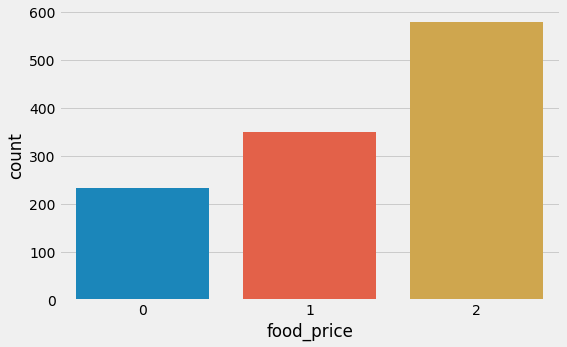

In [108]:
plt.figure(figsize = (8,5))
sns.countplot(df['food_price'])

1.0163440202588883

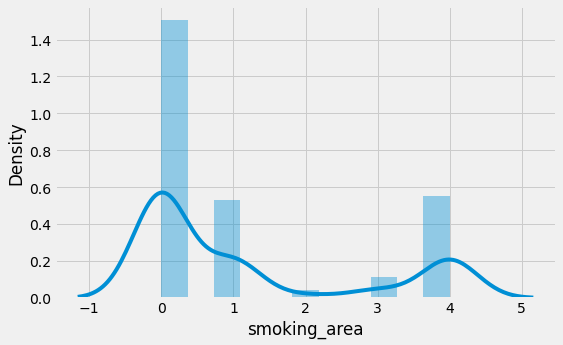

In [109]:
plt.figure(figsize=(8,5))
sns.distplot(df['smoking_area'])
df['smoking_area'].skew()

Text(0.5, 1.0, 'Count of States')

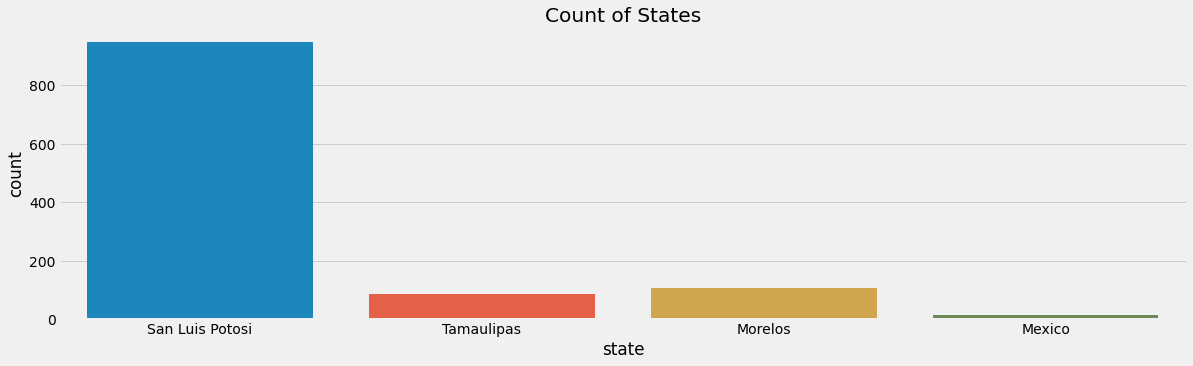

In [110]:
plt.figure(figsize=(18,5))
sns.countplot(df['state'])
plt.title('Count of States')

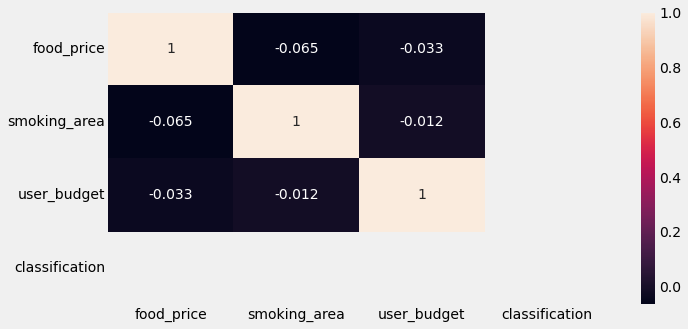

In [111]:
plt.figure(figsize=(10,5))
fig = df.corr()
sns.heatmap(fig, annot=True)

In [112]:
cnt = df['user_id'].unique()
k= len(cnt)
k

138

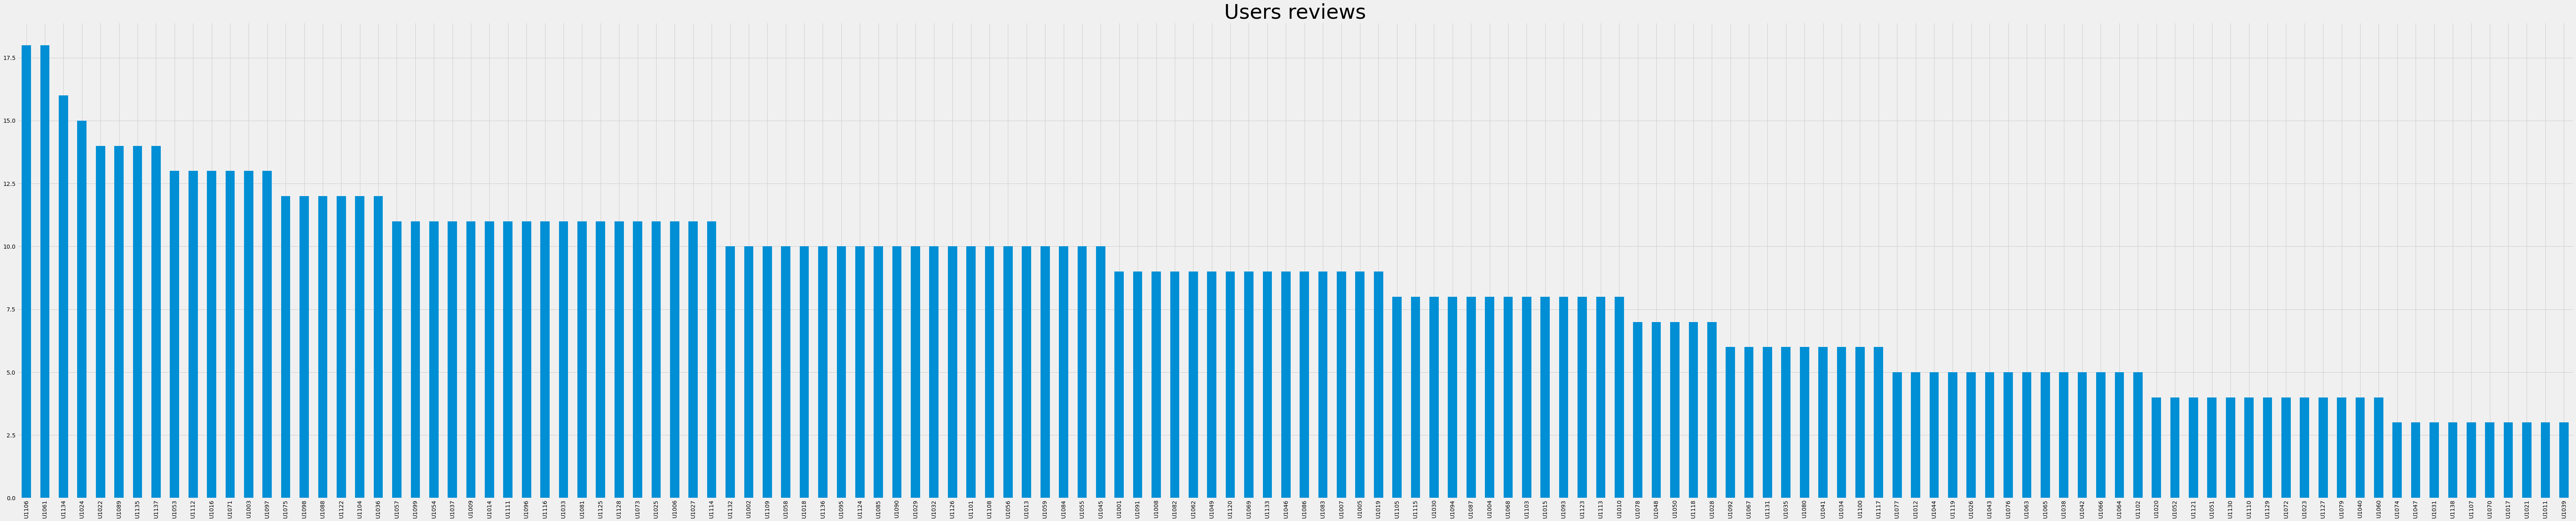

In [113]:
plt.figure(figsize=(100,20))
a = plt.title('Users reviews', fontsize=50)
df['user_id'].value_counts().head(k).plot.bar(a)

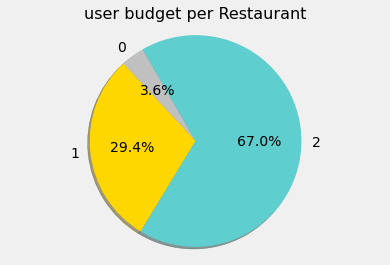

In [114]:
x = df.groupby('user_budget').agg('count')
labels = x.country.sort_values().index 
sizes= x.restaurant_name.sort_values()
colors = ['silver','gold','#5ECECF']
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis('equal')
plt.title("user budget per Restaurant", fontsize=16)
plt.show()

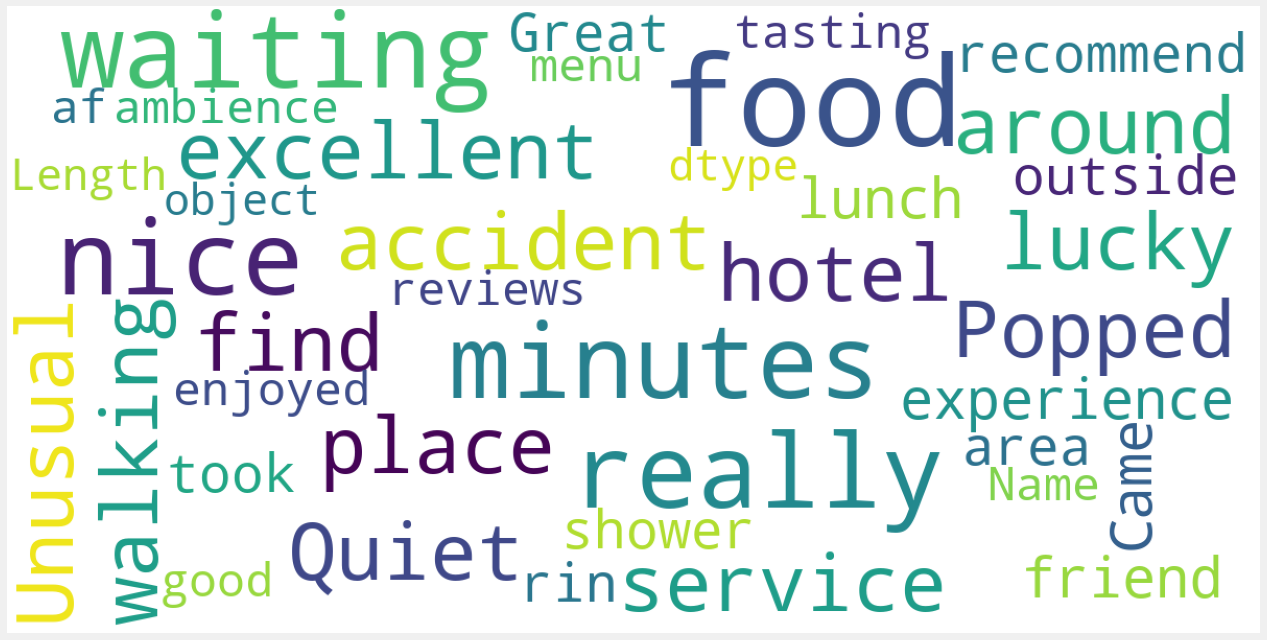

In [115]:
stopwords = set(STOPWORDS)

def MyWordcloud(data,title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=20000,
        max_font_size=40,
        scale = 3,
        random_state = 1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

MyWordcloud(df['reviews'].dropna())

#**SENTIMENT ANALYSIS**

In [116]:
missed_state = df['classification'].isnull()
for i,item in enumerate(df['reviews']):
  y = item
  edu=TextBlob(y)
  x = edu.sentiment.polarity
  if x<0:
      c1 = "Negative"
  elif x==0:
      c1 = "Neutral"
  else:
      c1 = "Positive"
  if missed_state[i]:
    df['classification'][i]=c1

In [117]:
df

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,2,1,Spanish,2,American,Just lucky to find this place. Quiet but very ...,Positive
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,2,4,Italian,2,Mexican,"The food was excellent, the service was very g...",Positive
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,1,0,Latin_American,2,Mexican,Popped in by accident walking around the hotel...,Neutral
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,2,0,Mexican,2,Bakery,Unusual experience. Came in with a friend & or...,Negative
4,U1068,P135104,vips,San Luis Potosi,San Luis Potosi,Mexico,2,1,Fast_Food,1,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1043,P132630,palomo tec,Victoria,Tamaulipas,Mexico,1,0,Italian,2,Mexican,"For about 10 minutes, we we're waiting for her...",Neutral
1157,U1011,P132715,tacos de la estacion,San Luis Potosi,San Luis Potosi,Mexico,1,0,International,2,Mexican,The shower area is outside so you can only rin...,Positive
1158,U1068,P132733,Little Cesarz,Ciudad Victoria,Tamaulipas,Mexico,2,1,Mexican,1,Mexican,Great food..took the tasting menu and enjoyed ...,Positive
1159,U1068,P132594,tacos de barbacoa enfrente del Tec,San Luis Potosi,San Luis Potosi,Mexico,1,1,American,1,Mexican,Food is really good ..... Nice ambience and af...,Positive


In [118]:
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x). sentiment)
#applt textblob sentiment to yelp text column
#and assign it to a new column named polarity
sentiment_series = df['polarity'].tolist()

df[['polaarity','subjectivity']]=pd.DataFrame(sentiment_series,
       index=df.index)
df.drop('polarity', inplace=True, axis=1)


In [119]:
df

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification,polaarity,subjectivity
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,2,1,Spanish,2,American,Just lucky to find this place. Quiet but very ...,Positive,0.504679,0.654359
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,2,4,Italian,2,Mexican,"The food was excellent, the service was very g...",Positive,0.734667,0.866000
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,1,0,Latin_American,2,Mexican,Popped in by accident walking around the hotel...,Neutral,0.000000,0.000000
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,2,0,Mexican,2,Bakery,Unusual experience. Came in with a friend & or...,Negative,-0.045231,0.665747
4,U1068,P135104,vips,San Luis Potosi,San Luis Potosi,Mexico,2,1,Fast_Food,1,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,Positive,0.050000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1043,P132630,palomo tec,Victoria,Tamaulipas,Mexico,1,0,Italian,2,Mexican,"For about 10 minutes, we we're waiting for her...",Neutral,0.000000,0.000000
1157,U1011,P132715,tacos de la estacion,San Luis Potosi,San Luis Potosi,Mexico,1,0,International,2,Mexican,The shower area is outside so you can only rin...,Positive,0.116667,0.533333
1158,U1068,P132733,Little Cesarz,Ciudad Victoria,Tamaulipas,Mexico,2,1,Mexican,1,Mexican,Great food..took the tasting menu and enjoyed ...,Positive,0.752500,0.745000
1159,U1068,P132594,tacos de barbacoa enfrente del Tec,San Luis Potosi,San Luis Potosi,Mexico,1,1,American,1,Mexican,Food is really good ..... Nice ambience and af...,Positive,0.566667,0.800000


In [120]:
df.to_csv("/content/restaurant_review_preprocessed_data.csv",index=False)

#**MODELS**

In [121]:
# READING THE PREPROCESSED CSV FILES
df1 = pd.read_csv("/content/restaurant_review_preprocessed_data.csv")
df1.head(5)

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification,polaarity,subjectivity
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,2,1,Spanish,2,American,Just lucky to find this place. Quiet but very ...,Positive,0.504679,0.654359
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,2,4,Italian,2,Mexican,"The food was excellent, the service was very g...",Positive,0.734667,0.866000
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,1,0,Latin_American,2,Mexican,Popped in by accident walking around the hotel...,Neutral,0.000000,0.000000
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,2,0,Mexican,2,Bakery,Unusual experience. Came in with a friend & or...,Negative,-0.045231,0.665747
4,U1068,P135104,vips,San Luis Potosi,San Luis Potosi,Mexico,2,1,Fast_Food,1,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,Positive,0.050000,1.000000


In [122]:
df1.shape

(1161, 15)

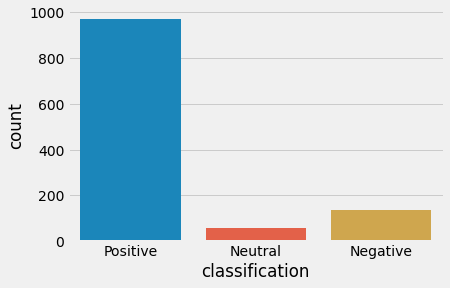

In [123]:
sns.countplot(x="classification",data=df1)

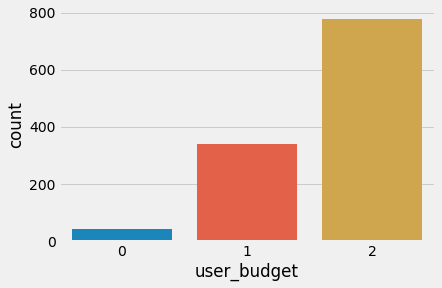

In [124]:
sns.countplot(x="user_budget",data=df1)

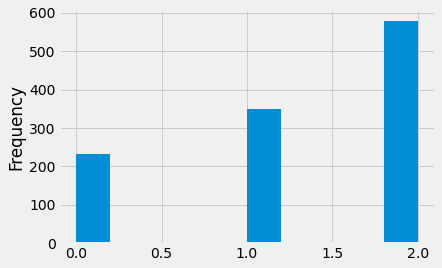

In [125]:
df1["food_price"].plot.hist()

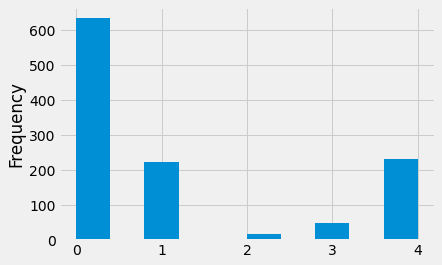

In [126]:
df1["smoking_area"].plot.hist()

In [127]:
df1.dtypes

user_id                object
place_id               object
restaurant_name        object
city                   object
state                  object
country                object
food_price              int64
smoking_area            int64
restaurant_cuisine     object
user_budget             int64
user_cuisine           object
reviews                object
classification         object
polaarity             float64
subjectivity          float64
dtype: object

In [128]:
df1.isnull().sum()

user_id               0
place_id              0
restaurant_name       0
city                  0
state                 0
country               0
food_price            0
smoking_area          0
restaurant_cuisine    0
user_budget           0
user_cuisine          0
reviews               0
classification        0
polaarity             0
subjectivity          0
dtype: int64

In [129]:
df1.head(5)

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification,polaarity,subjectivity
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,2,1,Spanish,2,American,Just lucky to find this place. Quiet but very ...,Positive,0.504679,0.654359
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,2,4,Italian,2,Mexican,"The food was excellent, the service was very g...",Positive,0.734667,0.866000
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,1,0,Latin_American,2,Mexican,Popped in by accident walking around the hotel...,Neutral,0.000000,0.000000
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,2,0,Mexican,2,Bakery,Unusual experience. Came in with a friend & or...,Negative,-0.045231,0.665747
4,U1068,P135104,vips,San Luis Potosi,San Luis Potosi,Mexico,2,1,Fast_Food,1,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,Positive,0.050000,1.000000


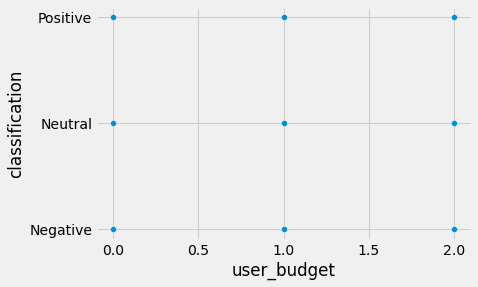

In [130]:
sns.scatterplot(x='user_budget', y='classification', data=df1)

In [131]:
df1.columns

Index(['user_id', 'place_id', 'restaurant_name', 'city', 'state', 'country',
       'food_price', 'smoking_area', 'restaurant_cuisine', 'user_budget',
       'user_cuisine', 'reviews', 'classification', 'polaarity',
       'subjectivity'],
      dtype='object')

In [132]:
from sklearn.preprocessing import LabelEncoder
labelencoder  = LabelEncoder()
df1['classification'] = labelencoder.fit_transform(df1['classification'])
df1['user_id'] = labelencoder.fit_transform(df1['user_id'])
df1['place_id'] = labelencoder.fit_transform(df1['place_id'])
df1['restaurant_name'] = labelencoder.fit_transform(df1['restaurant_name'])
df1['city'] = labelencoder.fit_transform(df1['city'])
df1['state'] = labelencoder.fit_transform(df1['state'])
df1['country'] = labelencoder.fit_transform(df1['country'])
df1['restaurant_cuisine'] = labelencoder.fit_transform(df1['restaurant_cuisine'])
df1['user_cuisine'] = labelencoder.fit_transform(df1['user_cuisine'])
df1['reviews'] = labelencoder.fit_transform(df1['reviews'])


In [133]:
x = df1[['user_id', 'place_id', 'restaurant_name', 'city', 'state', 'country',
       'food_price', 'smoking_area', 'restaurant_cuisine', 'user_budget',
       'user_cuisine', 'reviews','polaarity','subjectivity']]
y = df1['classification']

In [134]:
x   

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,polaarity,subjectivity
0,76,123,94,5,2,1,2,1,52,2,2,356,0.504679,0.654359
1,76,84,62,5,2,1,2,4,36,2,70,569,0.734667,0.866000
2,76,31,119,5,2,1,1,0,40,2,70,464,0.000000,0.000000
3,76,105,74,5,2,1,2,0,42,2,8,688,-0.045231,0.665747
4,67,126,128,5,2,1,2,1,29,1,14,725,0.050000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,11,116,8,3,1,1,0,36,2,70,199,0.000000,0.000000
1157,10,19,125,5,2,1,1,0,35,2,70,610,0.116667,0.533333
1158,67,23,36,2,3,1,2,1,42,1,70,218,0.752500,0.745000
1159,67,6,124,5,2,1,1,1,1,1,70,185,0.566667,0.800000


In [135]:
y

0       2
1       2
2       1
3       0
4       2
       ..
1156    1
1157    2
1158    2
1159    2
1160    1
Name: classification, Length: 1161, dtype: int64

##**SPLIT INTO TRAIN AND TEST DATA**

In [136]:
x=df1.drop('classification', axis=1)
y=df1[['classification']]
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 7)

##**LOGISTIC REGRESSION**

In [137]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
ypred1 = model1.predict(x_test)
print(ypred1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [138]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred1))
print("Classification report :\n",classification_report(y_test,ypred1))
print("TRAIN ACCURACY :",accuracy_score(y_train,model1.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred1))

Confussion matrix :
 [[  0   0  25]
 [  0   0  12]
 [  0   0 196]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        12
           2       0.84      1.00      0.91       196

    accuracy                           0.84       233
   macro avg       0.28      0.33      0.30       233
weighted avg       0.71      0.84      0.77       233

TRAIN ACCURACY : 0.834051724137931
TEST ACCURACY : 0.8412017167381974


##**K NEAREST NEIGHBOURS**

In [139]:
model2 = neighbors.KNeighborsClassifier()
model2.fit(x_train,y_train)
ypred2 = model2.predict(x_test)
print(ypred2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [140]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred2))
print("Classification report :\n",classification_report(y_test,ypred2))
print("TRAIN ACCURACY :",accuracy_score(y_train,model2.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred2))

Confussion matrix :
 [[  0   0  25]
 [  0   0  12]
 [  4   1 191]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        12
           2       0.84      0.97      0.90       196

    accuracy                           0.82       233
   macro avg       0.28      0.32      0.30       233
weighted avg       0.70      0.82      0.76       233

TRAIN ACCURACY : 0.8448275862068966
TEST ACCURACY : 0.8197424892703863


##**RANDOM FOREST**

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
ypred3 = model3.predict(x_test)
print(ypred3)

[0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 0 2 1 2 0 2 2 2 2 2 0 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 0 2 2 2 2 0 2
 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [142]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred3))
print("Classification report :\n",classification_report(y_test,ypred3))
print("TRAIN ACCURACY :",accuracy_score(y_train,model3.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred3))

Confussion matrix :
 [[ 25   0   0]
 [  0  12   0]
 [  0   0 196]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       196

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

TRAIN ACCURACY : 1.0
TEST ACCURACY : 1.0


##**DECISION TREE CLASSIFIER**

In [143]:
from sklearn import tree
model4 = tree.DecisionTreeClassifier(criterion='entropy')
model4.fit(x_train,y_train)
ypred4 = model4.predict(x_test)
print(ypred4)

[0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 0 2 1 2 0 2 2 2 2 2 0 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 0 2 2 2 2 0 2
 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [144]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred4))
print("Classification report :\n",classification_report(y_test,ypred4))
print("TRAIN ACCURACY :",accuracy_score(y_train,model4.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred4))

Confussion matrix :
 [[ 25   0   0]
 [  0  12   0]
 [  0   0 196]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       196

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

TRAIN ACCURACY : 1.0
TEST ACCURACY : 1.0


##**NAIVE BAYES**

In [145]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
ypred5 = model5.predict(x_test)
print(ypred5)

[0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 1 2 2 1 2 2 0 2 2 2 2 2 2 2 2 2 1 0 2 1 2 0 2 2 2 2 2 0 2 2 1 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 0 2 2 2 2 0 2
 2 2 0 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [146]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred5))
print("Classification report :\n",classification_report(y_test,ypred5))
print("TRAIN ACCURACY :",accuracy_score(y_train,model5.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred5))

Confussion matrix :
 [[ 25   0   0]
 [  1  11   0]
 [  3   1 192]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       0.92      0.92      0.92        12
           2       1.00      0.98      0.99       196

    accuracy                           0.98       233
   macro avg       0.93      0.97      0.94       233
weighted avg       0.98      0.98      0.98       233

TRAIN ACCURACY : 0.96875
TEST ACCURACY : 0.9785407725321889


##**SUPPORT VECTOR MACHINES**

In [147]:
from sklearn import svm
model6 = svm.SVC()
model6.fit(x_train,y_train)
ypred6 = model6.predict(x_test)
print(ypred6)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [148]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred6))
print("Classification report :\n",classification_report(y_test,ypred6))
print("TRAIN ACCURACY :",accuracy_score(y_train,model6.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred6))

Confussion matrix :
 [[  0   0  25]
 [  0   0  12]
 [  0   0 196]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        12
           2       0.84      1.00      0.91       196

    accuracy                           0.84       233
   macro avg       0.28      0.33      0.30       233
weighted avg       0.71      0.84      0.77       233

TRAIN ACCURACY : 0.834051724137931
TEST ACCURACY : 0.8412017167381974


##**K MEANS CLUSTERING**

In [149]:
from sklearn.cluster import KMeans
model7 = KMeans(n_clusters=3)
model7.fit(x_train,y_train)
ypred7 = model7.predict(x_test)
print(ypred7)

[0 2 0 1 1 0 0 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 1 2 0 2 1 1 2 0 0 2 2 2 1 0 0
 0 1 2 0 2 1 1 2 1 2 0 2 0 1 1 0 1 0 0 2 0 2 2 2 2 0 1 1 2 2 0 0 2 2 1 2 0
 2 2 1 0 2 1 2 1 0 0 0 2 2 1 2 1 1 2 1 2 2 1 0 1 1 2 0 2 1 1 2 2 2 1 1 2 1
 0 2 1 0 0 2 0 0 2 2 0 2 1 1 0 1 0 2 2 2 0 1 0 2 2 0 0 2 2 2 1 2 0 1 2 1 1
 1 1 2 2 2 2 2 1 2 1 2 1 0 0 2 1 1 1 0 1 0 0 1 0 1 1 0 2 1 0 0 1 1 2 2 0 1
 0 1 0 1 1 2 2 1 0 2 2 1 1 0 0 1 2 0 0 1 2 0 0 1 1 1 2 2 2 1 2 2 1 0 2 1 0
 0 1 1 1 2 0 2 0 0 1 0]


In [150]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred7))
print("Classification report :\n",classification_report(y_test,ypred7))
print("TRAIN ACCURACY :",accuracy_score(y_train,model7.predict(x_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred7))

Confussion matrix :
 [[11  4 10]
 [ 4  3  5]
 [55 71 70]]
Classification report :
               precision    recall  f1-score   support

           0       0.16      0.44      0.23        25
           1       0.04      0.25      0.07        12
           2       0.82      0.36      0.50       196

    accuracy                           0.36       233
   macro avg       0.34      0.35      0.27       233
weighted avg       0.71      0.36      0.45       233

TRAIN ACCURACY : 0.3297413793103448
TEST ACCURACY : 0.3605150214592275


#**PREDICTION**

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer

In [152]:
df2 = pd.read_csv('/content/restaurant_review_preprocessed_data.csv')

In [153]:
df2

,user_id,place_id,restaurant_name,city,state,country,food_price,smoking_area,restaurant_cuisine,user_budget,user_cuisine,reviews,classification,polaarity,subjectivity
0,U1077,P135085,Tortas Locas Hipocampo,San Luis Potosi,San Luis Potosi,Mexico,2,1,Spanish,2,American,Just lucky to find this place. Quiet but very ...,Positive,0.504679,0.654359
1,U1077,P135038,Restaurant la Chalita,San Luis Potosi,San Luis Potosi,Mexico,2,4,Italian,2,Mexican,"The food was excellent, the service was very g...",Positive,0.734667,0.866000
2,U1077,P132825,puesto de tacos,San Luis Potosi,San Luis Potosi,Mexico,1,0,Latin_American,2,Mexican,Popped in by accident walking around the hotel...,Neutral,0.000000,0.000000
3,U1077,P135060,Restaurante Marisco Sam,San Luis Potosi,San Luis Potosi,Mexico,2,0,Mexican,2,Bakery,Unusual experience. Came in with a friend & or...,Negative,-0.045231,0.665747
4,U1068,P135104,vips,San Luis Potosi,San Luis Potosi,Mexico,2,1,Fast_Food,1,Breakfast-Brunch,We had a really nice lunch here. I recommend t...,Positive,0.050000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1043,P132630,palomo tec,Victoria,Tamaulipas,Mexico,1,0,Italian,2,Mexican,"For about 10 minutes, we we're waiting for her...",Neutral,0.000000,0.000000
1157,U1011,P132715,tacos de la estacion,San Luis Potosi,San Luis Potosi,Mexico,1,0,International,2,Mexican,The shower area is outside so you can only rin...,Positive,0.116667,0.533333
1158,U1068,P132733,Little Cesarz,Ciudad Victoria,Tamaulipas,Mexico,2,1,Mexican,1,Mexican,Great food..took the tasting menu and enjoyed ...,Positive,0.752500,0.745000
1159,U1068,P132594,tacos de barbacoa enfrente del Tec,San Luis Potosi,San Luis Potosi,Mexico,1,1,American,1,Mexican,Food is really good ..... Nice ambience and af...,Positive,0.566667,0.800000


In [154]:
import string
import re
def clean_reviews(reviews):
    reviews = reviews.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    reviews = reviews.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    reviews = [w for w in reviews if not w in stops and len(w) >= 3]
    
    reviews = " ".join(reviews)
    
    # Clean the reviews
    reviews = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", reviews)
    reviews = re.sub(r"what's", "what is ", reviews)
    reviews = re.sub(r"\'s", " ", reviews)
    reviews = re.sub(r"\'ve", " have ", reviews)
    reviews = re.sub(r"n't", " not ", reviews)
    reviews = re.sub(r"i'm", "i am ", reviews)
    reviews = re.sub(r"\'re", " are ", reviews)
    reviews = re.sub(r"\'d", " would ", reviews)
    reviews = re.sub(r"\'ll", " will ", reviews)
    reviews = re.sub(r",", " ", reviews)
    reviews = re.sub(r"\.", " ", reviews)
    reviews = re.sub(r"!", " ! ", reviews)
    reviews = re.sub(r"\/", " ", reviews)
    reviews = re.sub(r"\^", " ^ ", reviews)
    reviews = re.sub(r"\+", " + ", reviews)
    reviews = re.sub(r"\-", " - ", reviews)
    reviews = re.sub(r"\=", " = ", reviews)
    reviews = re.sub(r"'", " ", reviews)
    reviews = re.sub(r"(\d+)(k)", r"\g<1>000", reviews)
    reviews = re.sub(r":", " : ", reviews)
    reviews = re.sub(r" e g ", " eg ", reviews)
    reviews = re.sub(r" b g ", " bg ", reviews)
    reviews = re.sub(r" u s ", " american ", reviews)
    reviews = re.sub(r"\0s", "0", reviews)
    reviews = re.sub(r" 9 11 ", "911", reviews)
    reviews = re.sub(r"e - mail", "email", reviews)
    reviews = re.sub(r"j k", "jk", reviews)
    reviews = re.sub(r"\s{2,}", " ", reviews)    
    return reviews

In [155]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
yelp_data = df2[['user_id','place_id','reviews']]
yelp_data['reviews'] = yelp_data['reviews'].apply(clean_reviews)

In [157]:
userid_df = yelp_data[['user_id','reviews']]
placeid_df = yelp_data[['place_id', 'reviews']]
userid_df = userid_df.groupby('user_id').agg({'reviews': ' '.join})
placeid_df = placeid_df.groupby('place_id').agg({'reviews': ' '.join})
#userid vectorizer
userid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
userid_vectors = userid_vectorizer.fit_transform(userid_df['reviews'])
userid_vectors.shape
#placeid vectorizer
placeid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
placeid_vectors = placeid_vectorizer.fit_transform(placeid_df['reviews'])
placeid_vectors.shape
P = pd.DataFrame(userid_vectors.toarray(), index=userid_df.index, columns=userid_vectorizer.get_feature_names())
Q = pd.DataFrame(placeid_vectors.toarray(), index=placeid_df.index, columns=placeid_vectorizer.get_feature_names())

In [158]:
P.head()

,!,-,1,10,2,20,3,4,5,50,500,5service,9,:,;,a,aam,able,absolute,absolutely,across,add,added,affordable,afternoon,again,all,almond,almost,along,already,also,although,always,am,amaazing,amazed,amazing,ambiance,ambience,...,west,weve,what,when,whenever,while,white,whole,wide,wife,will,wine,wines,winter,with,within,without,wonderful,work,worked,world,worst,worth,worthy,would,wouldbe,wouldnt,wow,wrong,yadav,yeah,years,yes,yesterday,yet,you,youre,yum,yummy,zero
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.098002,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.164569,0.126105,0.0,0.0,0.058932,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.091042,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
U1002,0.103942,0.037683,0.000000,0.000000,0.000000,0.0,0.000000,0.256657,0.288510,0.0,0.0,0.000000,0.000000,0.050098,0.0,0.084068,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.073702,0.128329,0.000000,0.0,0.033642,0.0,0.087272,0.000000,0.0,0.0,0.062504,0.0,0.077484,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.066874,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055936,0.0,0.0,0.000000,0.0
U1003,0.272206,0.065790,0.000000,0.064338,0.000000,0.0,0.000000,0.224047,0.604444,0.0,0.0,0.000000,0.000000,0.043733,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.054562,0.0,0.067639,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.030121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
U1004,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.189972,0.0,0.0,0.062422,0.000000,0.000000,0.0,0.000000,0.0,0.06662,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.052812,0.060662,0.0,0.110760,0.0,0.000000,0.000000,0.0,0.0,0.102890,0.0,0.063775,...,0.0,0.0,0.06662,0.0,0.0,0.0,0.06662,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.039267,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
U1005,0.117602,0.042635,0.038682,0.041694,0.095116,0.0,0.044256,0.000000,0.000000,0.0,0.0,0.000000,0.091577,0.198387,0.0,0.000000,0.0,0.00000,0.0,0.025779,0.0,0.0,0.0,0.0,0.0,0.025219,0.0,0.083388,0.000000,0.000000,0.0,0.152252,0.0,0.000000,0.000000,0.0,0.0,0.070718,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.049651,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.054624,0.0,0.019520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031644,0.0,0.0,0.033176,0.0


In [159]:
Q.head()

,!,-,1,10,2,20,3,4,5,50,500,5service,9,:,;,a,aam,able,absolute,absolutely,across,add,added,affordable,afternoon,again,all,almond,almost,along,already,also,although,always,am,amaazing,amazed,amazing,ambiance,ambience,...,west,weve,what,when,whenever,while,white,whole,wide,wife,will,wine,wines,winter,with,within,without,wonderful,work,worked,world,worst,worth,worthy,would,wouldbe,wouldnt,wow,wrong,yadav,yeah,years,yes,yesterday,yet,you,youre,yum,yummy,zero
place_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P132560,0.044750,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.145019,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.072681,0.0,0.0,0.0,0.102591,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.126877,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
P132561,0.035345,0.051889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.059298,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.040515,0.000000,0.044071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106472,0.0,0.000000,0.0,0.0,0.0,0.106472,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.103168,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
P132564,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075971,0.0,0.000000,0.0,0.0,0.0,0.000000,0.131041,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
P132572,0.141395,0.041515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073659,0.0,0.000000,0.0,0.0,0.0,0.097245,0.063527,0.035260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.080177,0.0,0.0,0.0,0.000000,0.056283,0.0,0.091641,0.0,0.0,0.052713,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.065773,0.0
P132583,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189013,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.152351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.163086,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [160]:
duplicate = df2[df2.duplicated()]
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             0 non-null      object 
 1   place_id            0 non-null      object 
 2   restaurant_name     0 non-null      object 
 3   city                0 non-null      object 
 4   state               0 non-null      object 
 5   country             0 non-null      object 
 6   food_price          0 non-null      int64  
 7   smoking_area        0 non-null      int64  
 8   restaurant_cuisine  0 non-null      object 
 9   user_budget         0 non-null      int64  
 10  user_cuisine        0 non-null      object 
 11  reviews             0 non-null      object 
 12  classification      0 non-null      object 
 13  polaarity           0 non-null      float64
 14  subjectivity        0 non-null      float64
dtypes: float64(2), int64(3), object(10)
memory usage: 0.0+ bytes


In [161]:
userid_rating_matrix = pd.pivot_table(df2,values="polaarity",index=['user_id'],columns=['place_id'])
userid_rating_matrix.shape

(138, 130)

In [162]:
userid_rating_matrix

place_id,P132560,P132561,P132564,P132572,P132583,P132584,P132594,P132608,P132609,P132613,P132626,P132630,P132654,P132660,P132663,P132665,P132667,P132668,P132706,P132715,P132717,P132723,P132732,P132733,P132740,P132754,P132755,P132766,P132767,P132768,P132773,P132825,P132830,P132834,P132845,P132846,P132847,P132851,P132854,P132856,...,P135044,P135045,P135046,P135047,P135048,P135049,P135050,P135051,P135052,P135053,P135054,P135055,P135057,P135058,P135059,P135060,P135062,P135063,P135064,P135065,P135066,P135069,P135070,P135071,P135072,P135073,P135074,P135075,P135076,P135079,P135080,P135081,P135082,P135085,P135086,P135088,P135104,P135106,P135108,P135109
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.433333,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.50000,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368571,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,0.198604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,0.383333,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,NaN,NaN,NaN,0.700000,0.322857,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460260,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,0.194444,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423136,0.237037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439583,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.422727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.369481,NaN,NaN,NaN,NaN,NaN,0.41375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,NaN,NaN,NaN,0.664667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453333,NaN,NaN,NaN,NaN,NaN,0.231111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.325,NaN,0.422857,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236364,NaN,NaN,0.613333,NaN,NaN,NaN,0.533333,0.45,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.248611,NaN,0.405714,-0.500000,NaN,NaN,0.350000,NaN,NaN,NaN,NaN,NaN,NaN
U1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.145833,NaN,NaN,NaN,NaN,NaN,0.486667,...,NaN,-0.12381,NaN,NaN,NaN,NaN,NaN,NaN,0.504762,NaN,NaN,NaN,NaN,0.593750,NaN,0.600000,NaN,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.150000,NaN,NaN
U1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.875000,NaN,-0.110294,NaN,NaN,NaN,NaN,NaN,NaN,0.426786,NaN,NaN,NaN,NaN,NaN,NaN,0.285511,NaN,NaN,NaN,NaN,NaN,0.875,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
def matrix_factorization(R,P,Q,steps=100,gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        
    return P,Q

In [164]:
P, Q = matrix_factorization(userid_rating_matrix, P, Q, steps=100, gamma=0.001,lamda=0.02)

In [165]:
sentence = str(input())
test_df= pd.DataFrame([sentence], columns=['reviews'])
test_df['reviews'] = test_df['reviews'].apply(clean_reviews)
test_vectors = userid_vectorizer.transform(test_df['reviews'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index, columns=userid_vectorizer.get_feature_names())
predict_item_rating=pd.DataFrame(np.dot(test_v_df.loc[0],Q.T),index=Q.index,columns=['polaarity'])
top_recommendations=pd.DataFrame.sort_values(predict_item_rating,['polaarity'],ascending=[0])[:10]
top_recommendations

EXCELLENT FOOD WITH PLEASANT ATMOSPHERE


,polaarity
place_id,
P135040,0.344398
P134999,0.221623
P132583,0.215803
P135033,0.187712
P134976,0.178318
P135011,0.178179
P135109,0.175426
P135038,0.150889
P135069,0.148240
